# Tutorial 5 - Seaborn & Clustering

## Outline

+ Introduction and installation
+ Data visualization with `catplot`, `relplot` and `pairplot`
+ Correlation matrix
+ Clustering
+ Quick Markdown & LaTeX syntax

## Seaborn

+ [Documentation](https://seaborn.pydata.org/index.html)
+ Installation: `pip install seaborn` or `conda install seaborn -c conda-forge`

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn also provides better integration with Pandas data structures.

<img src="http://seaborn.pydata.org/_images/scatterplot_matrix.png" width="800" />

### Bar Plot

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/mac_1/Desktop/CHEM C142/compounds.csv")
df.head()

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0


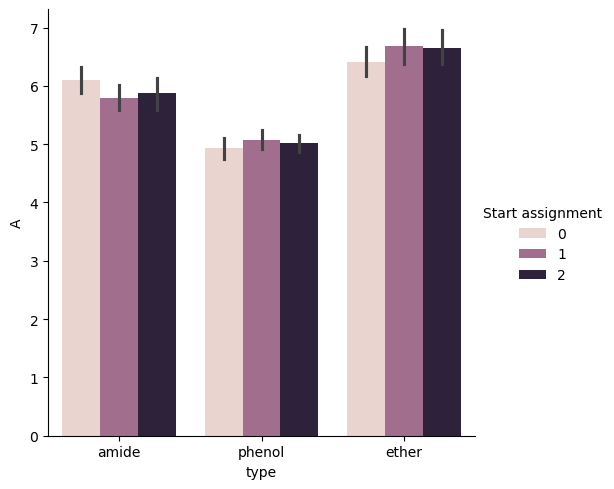

In [12]:
sns.catplot(data=df, x='type',y = 'A', kind = 'bar',hue ='Start assignment')

### Violin plot

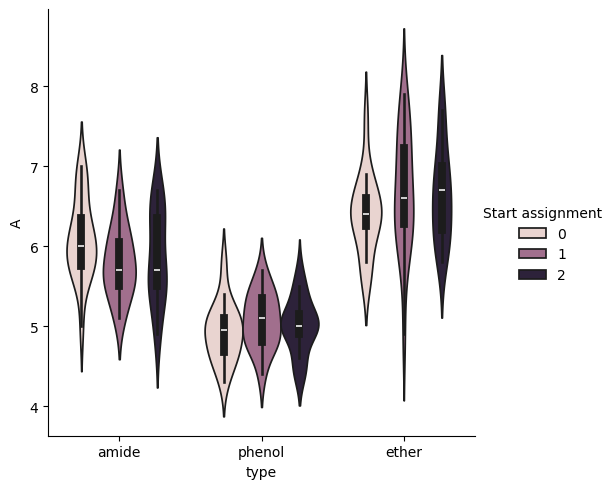

In [11]:
sns.catplot(data=df,kind = 'violin', x = 'type', y = 'A', hue ='Start assignment')

### Scatter plot

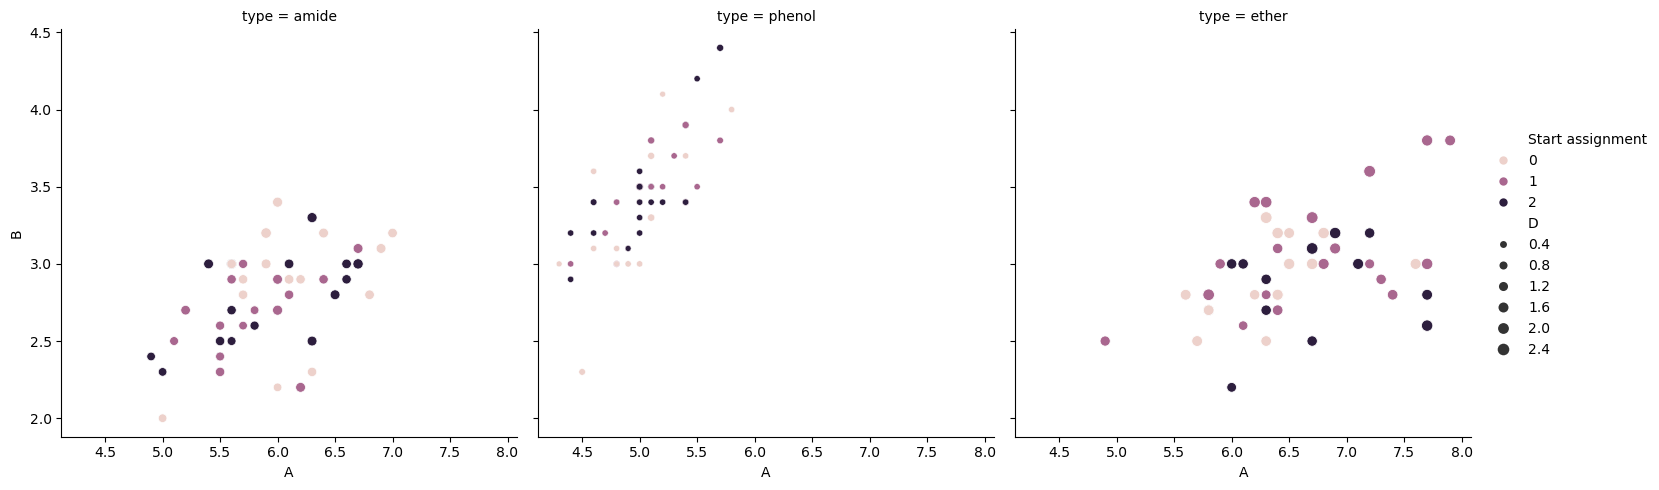

In [18]:
sns.relplot(data= df, x= 'A', y = 'B', col = 'type', hue = 'Start assignment', size = 'D')

### Pair Plot

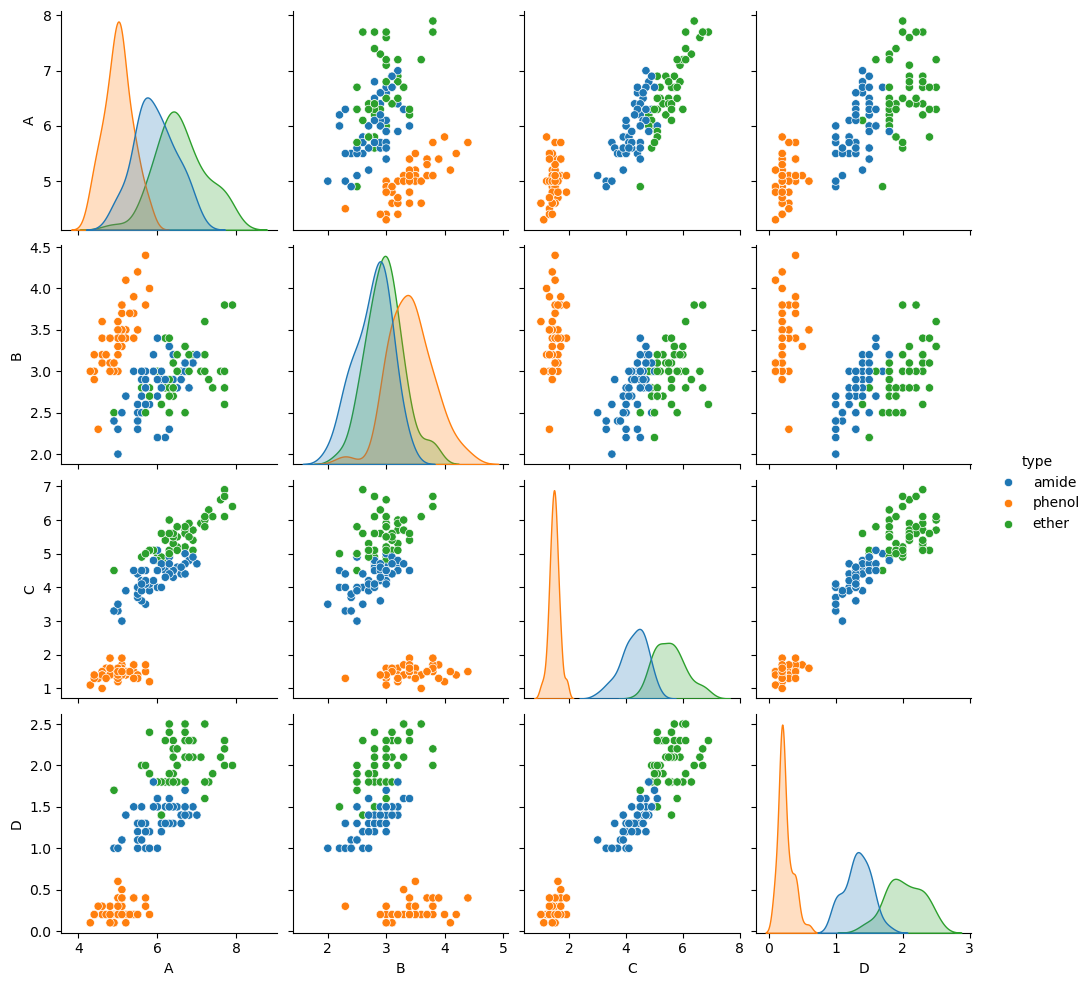

In [22]:
newdf = df.drop(['Start assignment'], axis = 1)
sns.pairplot(data = newdf, hue = 'type')

## Correlation matrix

The **correlation coefficient** between two random variables $\mathrm{X}$ and $\mathrm{Y}$ are defined as:

$$\frac{\mathrm{Cov}(\mathrm{X,Y})}{\sqrt{\mathrm{Var}(\mathrm{X})\mathrm{Var}(\mathrm{Y})}}=\frac{\sum_{i}(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{[\sum_i (X_i-\bar{X})^2][\sum_i (Y_i-\bar{Y})^2]}}$$

The correlation coefficient should be in the range of $[-1, 1]$. When $X=Y$, the correlation coefficient will be $1$, and when $X=-Y$ the correlation coefficient will be $-1$.

In [3]:
import numpy as np


X = np.random.random(1000)
Y = np.random.random(1000)

def corrcoef(X, Y):
    X_shift = X - np.mean(X)
    Y_shift = Y - np.mean(Y)
    return np.sum(X_shift * Y_shift) / np.sqrt(np.sum(X_shift ** 2) * np.sum(Y_shift ** 2))

corrcoef(X, Y)

0.03230762867045676

In [4]:
wines = pd.read_csv("/Users/mac_1/Desktop/CHEM C142/wines.csv").iloc[:, :-2]
features = wines.values
features.shape
wines

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


array([[ 1.        ,  0.09439694,  0.2115446 , -0.31023514,  0.27079823,
         0.28910112,  0.23681493, -0.15592947,  0.13669791,  0.5463642 ,
        -0.0717472 ,  0.07234319,  0.64372004],
       [ 0.09439694,  1.        ,  0.16404547,  0.2885004 , -0.0545751 ,
        -0.335167  , -0.41100659,  0.29297713, -0.22074619,  0.24898534,
        -0.56129569, -0.36871043, -0.19201056],
       [ 0.2115446 ,  0.16404547,  1.        ,  0.44336719,  0.28658669,
         0.12897954,  0.11507728,  0.18623045,  0.00965194,  0.25888726,
        -0.07466689,  0.00391123,  0.22362626],
       [-0.31023514,  0.2885004 ,  0.44336719,  1.        , -0.08333309,
        -0.32111332, -0.35136986,  0.36192172, -0.19732684,  0.01873198,
        -0.27395522, -0.27676855, -0.44059693],
       [ 0.27079823, -0.0545751 ,  0.28658669, -0.08333309,  1.        ,
         0.21440123,  0.19578377, -0.25629405,  0.23644061,  0.19995001,
         0.0553982 ,  0.06600394,  0.39335085],
       [ 0.28910112, -0.335167

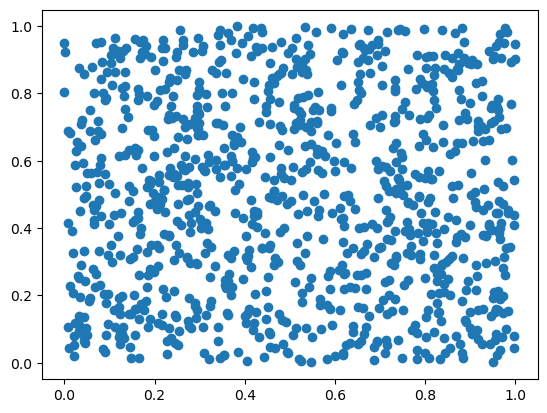

In [33]:
# use numpy to calculate corr coef
import matplotlib.pyplot as plt
plt.scatter(X,Y)
cormat = np.corrcoef(features.T)
cormat

<AxesSubplot:>

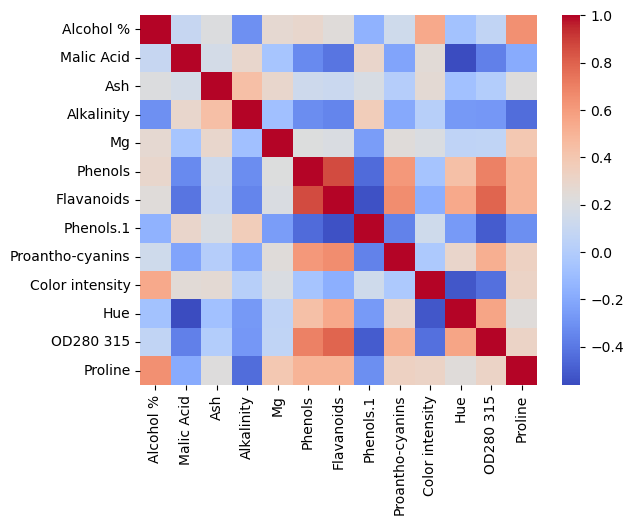

In [43]:
# seaborn vis
sns.heatmap(cormat, cmap = 'coolwarm', xticklabels = wines.columns, yticklabels = wines.columns)

## Clustering

Clustering is a machine learning technique that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. It's widely used for exploratory data analysis to find natural groupings, patterns, or structures within data without prior knowledge of group definitions.

<img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg" width="600" />

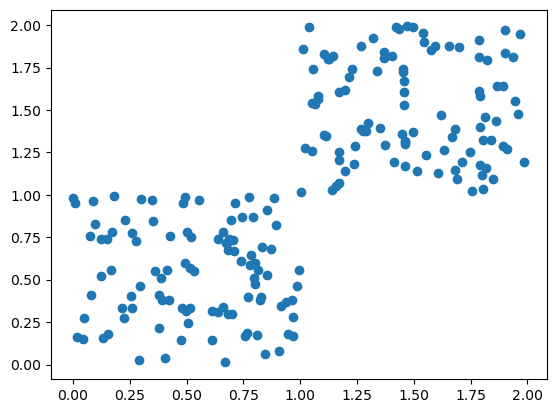

In [44]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def generate_data():
    return np.vstack([
        np.random.random((100, 2)),
        np.random.random((100, 2)) + 1
    ])

data = generate_data()
plt.scatter(data[:, 0], data[:, 1])

In [47]:
# cluster with K-Means
from sklearn.cluster import KMeans

model = KMeans(2)
model.fit(data)

/Users/mac_1/opt/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

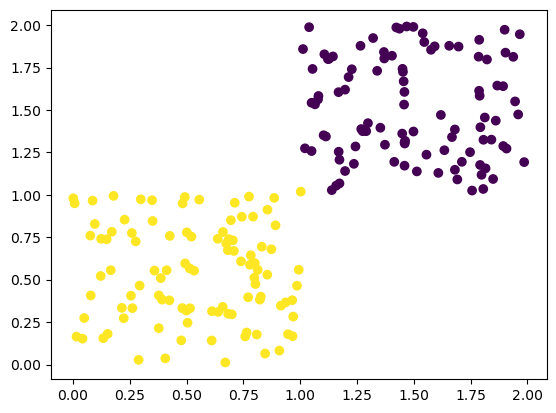

In [49]:
plt.scatter(data[:,0],data[:,1], c= model.labels_)

## Quick Markdown & LaTeX Syntax

# Header 1

## Header 2

### Header 3

List:
- Foo
+ Bar

**Bold**

*Italic*

Inline Math: $A, B, C, D, \alpha, \beta, \gamma, \lambda, \delta$

Displaymode Math:

$$ \frac{\partial f}{\partial X} $$

$$ \mathrm{A}, \mathbf{X} $$

[Hyperlink](http://www.google.com)

**Bolds**
